In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 100)


In [2]:
# use !wget -nc 'github path' to pull the nba stats data
#player logs
!wget "https://raw.githubusercontent.com/jtjia26/ITP349_NBAStats_Tjia/refs/heads/main/nba_game_log_2021_22.csv"
nba_player_log = pd.read_csv('nba_game_log_2021_22.csv')
# player salaries
!wget "https://raw.githubusercontent.com/jtjia26/ITP349_NBAStats_Tjia/refs/heads/main/nba_salary_2021_22.csv"
player_salaries = pd.read_csv('nba_salary_2021_22.csv')


--2025-03-10 20:17:41--  https://raw.githubusercontent.com/jtjia26/ITP349_NBAStats_Tjia/refs/heads/main/nba_game_log_2021_22.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13427331 (13M) [text/plain]
Saving to: ‘nba_game_log_2021_22.csv’

nba_game_log_2021_2 100%[===================>]  12.80M  47.0MB/s    in 0.3s    

2025-03-10 20:17:42 (47.0 MB/s) - ‘nba_game_log_2021_22.csv’ saved [13427331/13427331]

--2025-03-10 20:17:44--  https://raw.githubusercontent.com/jtjia26/ITP349_NBAStats_Tjia/refs/heads/main/nba_salary_2021_22.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTT

In [3]:
# view columns and null counts for each column in the data frames
print(nba_player_log.columns)
print(nba_player_log.info())
print(player_salaries.columns)
print(player_salaries.info())

Index(['game_id', 'game_date', 'OT', 'H_A', 'Team_Abbrev', 'Team_Score',
       'Team_pace', 'Team_efg_pct', 'Team_tov_pct', 'Team_orb_pct',
       'Team_ft_rate', 'Team_off_rtg', 'Inactives', 'Opponent_Abbrev',
       'Opponent_Score', 'Opponent_pace', 'Opponent_efg_pct',
       'Opponent_tov_pct', 'Opponent_orb_pct', 'Opponent_ft_rate',
       'Opponent_off_rtg', 'player', 'player_id', 'starter', 'mp', 'fg', 'fga',
       'fg_pct', 'fg3', 'fg3a', 'fg3_pct', 'ft', 'fta', 'ft_pct', 'orb', 'drb',
       'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'plus_minus',
       'did_not_play', 'is_inactive', 'ts_pct', 'efg_pct', 'fg3a_per_fga_pct',
       'fta_per_fga_pct', 'orb_pct', 'drb_pct', 'trb_pct', 'ast_pct',
       'stl_pct', 'blk_pct', 'tov_pct', 'usg_pct', 'off_rtg', 'def_rtg', 'bpm',
       'season', 'minutes', 'double_double', 'triple_double', 'DKP', 'FDP',
       'SDP', 'DKP_per_minute', 'FDP_per_minute', 'SDP_per_minute',
       'pf_per_minute', 'ts', 'last_60_minutes_per_game_s

In [4]:
# shape of the data frames


# player game log:
print("NBA player log shape:")
print(nba_player_log.shape)
# player salaries
print("NBA salaries log shape:")
print(player_salaries.shape)


NBA player log shape:
(31608, 81)
NBA salaries log shape:
(649, 7)


In [5]:
# show first five rows of each data frame
# nba player log
print(nba_player_log.head())
print("\n")
# player salaries
print(player_salaries.head())


        game_id  game_date  OT H_A Team_Abbrev  Team_Score  Team_pace  \
0  202204100BRK  4/10/2022   0   A         IND         126      103.9   
1  202204100BRK  4/10/2022   0   A         IND         126      103.9   
2  202204100BRK  4/10/2022   0   A         IND         126      103.9   
3  202204100BRK  4/10/2022   0   A         IND         126      103.9   
4  202204100BRK  4/10/2022   0   A         IND         126      103.9   

   Team_efg_pct  Team_tov_pct  Team_orb_pct  ...  pf_per_minute     ts  \
0         0.543           5.9          20.8  ...       0.000000  14.44   
1         0.543           5.9          20.8  ...       0.083604  23.00   
2         0.543           5.9          20.8  ...       0.139730  21.76   
3         0.543           5.9          20.8  ...       0.156169   4.88   
4         0.543           5.9          20.8  ...       0.097192  15.88   

  last_60_minutes_per_game_starting last_60_minutes_per_game_bench    PG%  \
0                         36.176282    

In [6]:
# clean player logs
top_scorer_df = nba_player_log[['game_id', 'game_date','H_A', 'Team_Abbrev','Opponent_Abbrev','player', 'pts','minutes']]
print(top_scorer_df.head())

print(top_scorer_df.info())
print("Player log data: ")
print("Shape before dropping duplicates and unneeded columns: ")
print(nba_player_log.shape)

top_scorer_df = top_scorer_df.drop_duplicates()
print(top_scorer_df.info())


print("Shape after dropping duplicates and unneeded columns: ")
print(top_scorer_df.shape)


# clean player salary data
top_salary_df = player_salaries[['Player', '2021/22']]
top_salary_df = top_salary_df.drop_duplicates()
print(top_salary_df.info())
print(top_salary_df.shape)



        game_id  game_date H_A Team_Abbrev Opponent_Abbrev             player  \
0  202204100BRK  4/10/2022   A         IND             BRK  Tyrese Haliburton   
1  202204100BRK  4/10/2022   A         IND             BRK        Buddy Hield   
2  202204100BRK  4/10/2022   A         IND             BRK     Oshae Brissett   
3  202204100BRK  4/10/2022   A         IND             BRK     Isaiah Jackson   
4  202204100BRK  4/10/2022   A         IND             BRK     T.J. McConnell   

   pts    minutes  
0   17  39.466667  
1   21  35.883333  
2   28  35.783333  
3    7  32.016667  
4   14  30.866667  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31608 entries, 0 to 31607
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_id          31608 non-null  object 
 1   game_date        31608 non-null  object 
 2   H_A              31608 non-null  object 
 3   Team_Abbrev      31608 non-null  object 
 4   Oppo

In [7]:
print(top_scorer_df.head())
print(top_salary_df.head())

        game_id  game_date H_A Team_Abbrev Opponent_Abbrev             player  \
0  202204100BRK  4/10/2022   A         IND             BRK  Tyrese Haliburton   
1  202204100BRK  4/10/2022   A         IND             BRK        Buddy Hield   
2  202204100BRK  4/10/2022   A         IND             BRK     Oshae Brissett   
3  202204100BRK  4/10/2022   A         IND             BRK     Isaiah Jackson   
4  202204100BRK  4/10/2022   A         IND             BRK     T.J. McConnell   

   pts    minutes  
0   17  39.466667  
1   21  35.883333  
2   28  35.783333  
3    7  32.016667  
4   14  30.866667  
              Player   2021/22
0      Stephen Curry  45780966
1          John Wall  44310840
2       James Harden  44310840
3  Russell Westbrook  44211146
4       Kevin Durant  42018900


In [23]:
# use pd.merge() to combine to two datasets, then clean the resulting data frame
player_stats_salaries = pd.merge(top_scorer_df,top_salary_df,how='left',left_on='player',right_on='Player')
print(player_stats_salaries.shape)
print(player_stats_salaries.info())

(31282, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31282 entries, 0 to 31281
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_id          31282 non-null  object 
 1   game_date        31282 non-null  object 
 2   H_A              31282 non-null  object 
 3   Team_Abbrev      31282 non-null  object 
 4   Opponent_Abbrev  31282 non-null  object 
 5   player           31282 non-null  object 
 6   pts              31282 non-null  int64  
 7   minutes          31282 non-null  float64
 8   Player           28218 non-null  object 
 9   2021/22          28218 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 2.4+ MB
None


In [24]:
# Assuming 'player_stats_salaries' is your merged DataFrame
player_stats_salaries['salary_missing'] = player_stats_salaries['2021/22'].isnull()
player_stats_salaries[['pts', 'minutes', 'salary_missing']].corr()

,pts,minutes,salary_missing
pts,1.000000,0.788507,-0.068808
minutes,0.788507,1.000000,-0.050154
salary_missing,-0.068808,-0.050154,1.000000


In [9]:
# drop null rows with null values
print(player_stats_salaries.head(100))
player_stats_salaries = player_stats_salaries.dropna(how='any')

         game_id  game_date H_A Team_Abbrev Opponent_Abbrev  \
0   202204100BRK  4/10/2022   A         IND             BRK   
1   202204100BRK  4/10/2022   A         IND             BRK   
2   202204100BRK  4/10/2022   A         IND             BRK   
3   202204100BRK  4/10/2022   A         IND             BRK   
4   202204100BRK  4/10/2022   A         IND             BRK   
5   202204100BRK  4/10/2022   A         IND             BRK   
6   202204100BRK  4/10/2022   A         IND             BRK   
7   202204100BRK  4/10/2022   A         IND             BRK   
8   202204100BRK  4/10/2022   A         IND             BRK   
9   202204100BRK  4/10/2022   A         IND             BRK   
10  202204100BRK  4/10/2022   A         IND             BRK   
11  202204100BRK  4/10/2022   A         IND             BRK   
12  202204100BRK  4/10/2022   H         BRK             IND   
13  202204100BRK  4/10/2022   H         BRK             IND   
14  202204100BRK  4/10/2022   H         BRK            

In [10]:
print(player_stats_salaries.info())
print(player_stats_salaries.shape)
print(player_stats_salaries.head())

<class 'pandas.core.frame.DataFrame'>
Index: 28218 entries, 0 to 31281
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_id          28218 non-null  object 
 1   game_date        28218 non-null  object 
 2   H_A              28218 non-null  object 
 3   Team_Abbrev      28218 non-null  object 
 4   Opponent_Abbrev  28218 non-null  object 
 5   player           28218 non-null  object 
 6   pts              28218 non-null  int64  
 7   minutes          28218 non-null  float64
 8   Player           28218 non-null  object 
 9   2021/22          28218 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 2.4+ MB
None
(28218, 10)
        game_id  game_date H_A Team_Abbrev Opponent_Abbrev             player  \
0  202204100BRK  4/10/2022   A         IND             BRK  Tyrese Haliburton   
1  202204100BRK  4/10/2022   A         IND             BRK        Buddy Hield   
2  202204100BRK  4/10/

In [11]:
player_stats_salaries = player_stats_salaries.rename(columns={"2021/22":"Salary", "H_A":"Home_Away"})

In [12]:
print(player_stats_salaries.head())

        game_id  game_date Home_Away Team_Abbrev Opponent_Abbrev  \
0  202204100BRK  4/10/2022         A         IND             BRK   
1  202204100BRK  4/10/2022         A         IND             BRK   
2  202204100BRK  4/10/2022         A         IND             BRK   
3  202204100BRK  4/10/2022         A         IND             BRK   
5  202204100BRK  4/10/2022         A         IND             BRK   

              player  pts    minutes             Player      Salary  
0  Tyrese Haliburton   17  39.466667  Tyrese Haliburton   4023600.0  
1        Buddy Hield   21  35.883333        Buddy Hield  23073234.0  
2     Oshae Brissett   28  35.783333     Oshae Brissett   1701593.0  
3     Isaiah Jackson    7  32.016667     Isaiah Jackson   2451240.0  
5       Terry Taylor   10  23.616667       Terry Taylor    342984.0  


In [13]:
print(player_stats_salaries.shape)

(28218, 10)


In [14]:

# Histogram prep - need total points grouped by game_id
print(player_stats_salaries.head())
print('\n')
# store view in df named 'points_by_game_dist'
points_by_game_dist = player_stats_salaries.groupby(by=['game_id'], as_index=False).agg({'pts':'sum'})
print(points_by_game_dist.head())


        game_id  game_date Home_Away Team_Abbrev Opponent_Abbrev  \
0  202204100BRK  4/10/2022         A         IND             BRK   
1  202204100BRK  4/10/2022         A         IND             BRK   
2  202204100BRK  4/10/2022         A         IND             BRK   
3  202204100BRK  4/10/2022         A         IND             BRK   
5  202204100BRK  4/10/2022         A         IND             BRK   

              player  pts    minutes             Player      Salary  
0  Tyrese Haliburton   17  39.466667  Tyrese Haliburton   4023600.0  
1        Buddy Hield   21  35.883333        Buddy Hield  23073234.0  
2     Oshae Brissett   28  35.783333     Oshae Brissett   1701593.0  
3     Isaiah Jackson    7  32.016667     Isaiah Jackson   2451240.0  
5       Terry Taylor   10  23.616667       Terry Taylor    342984.0  


        game_id  pts
0  202110190LAL  230
1  202110190MIL  198
2  202110200CHO  206
3  202110200DET  182
4  202110200MEM  240


(array([  3.,   4.,   5.,   6.,  16.,  28.,  30.,  41.,  72.,  80.,  76.,
        102., 100., 104.,  82., 105.,  86.,  67.,  64.,  54.,  35.,  24.,
         19.,   9.,   8.,   5.,   2.,   1.,   1.,   1.]),
 array([137.        , 141.93333333, 146.86666667, 151.8       ,
        156.73333333, 161.66666667, 166.6       , 171.53333333,
        176.46666667, 181.4       , 186.33333333, 191.26666667,
        196.2       , 201.13333333, 206.06666667, 211.        ,
        215.93333333, 220.86666667, 225.8       , 230.73333333,
        235.66666667, 240.6       , 245.53333333, 250.46666667,
        255.4       , 260.33333333, 265.26666667, 270.2       ,
        275.13333333, 280.06666667, 285.        ]),
 <BarContainer object of 30 artists>)

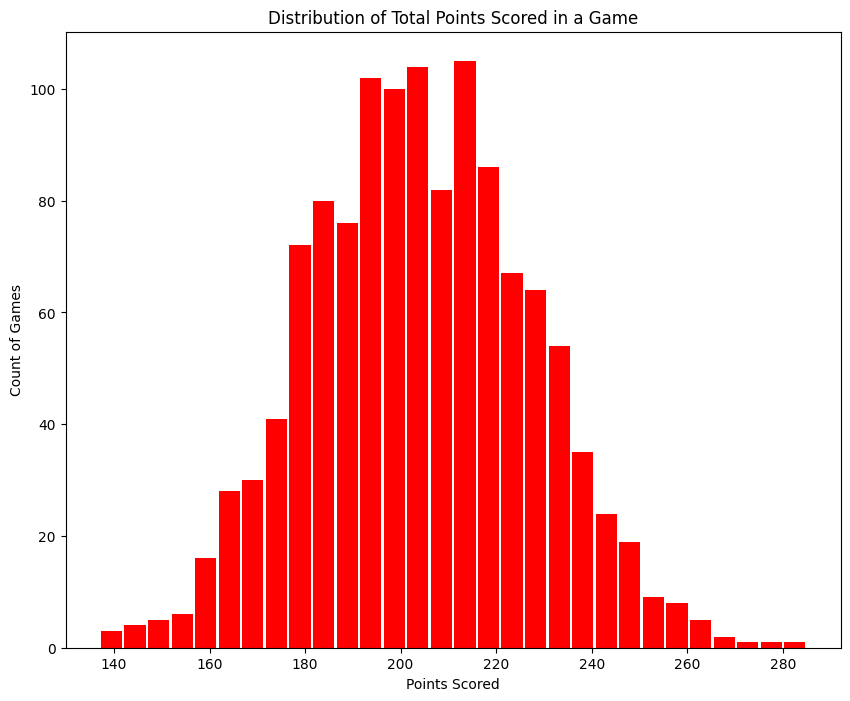

In [15]:
# Histogram
# sets size of figure
fig, ax = plt.subplots(figsize=(10,8), dpi=100)


# set title and axis labels
plt.title(label='Distribution of Total Points Scored in a Game')
plt.xlabel('Points Scored')
plt.ylabel('Count of Games')
# write code to create histogram here
plt.hist(points_by_game_dist['pts'], bins=30, color='red', rwidth=0.9)





In [16]:
# bar chart/horizontal bar chart prep
team_salary_breakdown = player_stats_salaries.groupby(by=['Player', 'Team_Abbrev'], as_index=False).agg({'Salary':'mean'})

# total team salary breakdown
total_team_salary = team_salary_breakdown.groupby(by=['Team_Abbrev'], as_index=False).agg({'Salary':'sum'})
total_team_salary['Salary'] = total_team_salary['Salary'].apply(lambda x: x*.000001)
total_team_salary = total_team_salary.sort_values(by=['Salary'], ascending=False)

print(total_team_salary.head())

   Team_Abbrev      Salary
2          BRK  223.581905
22         PHI  205.724357
29         WAS  180.507883
13         LAL  179.637341
24         POR  174.522078


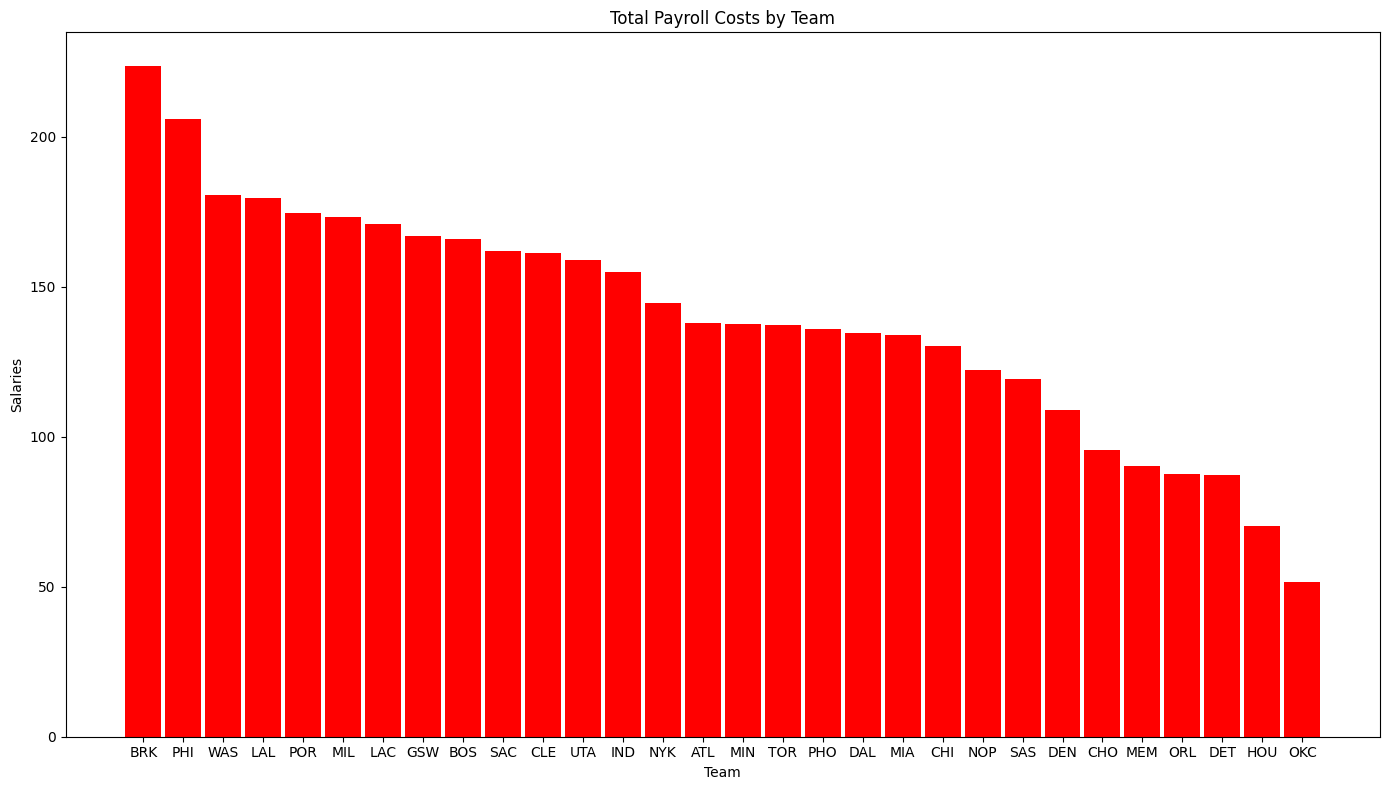

In [17]:
# Bar chart - break down of total salaries paid by team
fig, ax = plt.subplots(figsize=(14,8), dpi=100)


# set title, and axis labels
plt.title(label='Total Payroll Costs by Team')
plt.xlabel('Team')
plt.ylabel('Salaries')
plt.yticks


# write code to create bar chart here
plt.bar(x=total_team_salary['Team_Abbrev'], height=total_team_salary['Salary'], width = 0.9, color='red')
plt.tight_layout()
plt.show()


<BarContainer object of 30 artists>

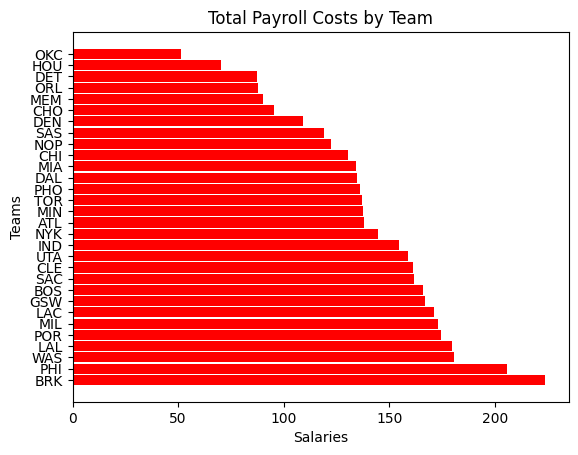

In [18]:
plt.title(label='Total Payroll Costs by Team')
plt.xlabel('Salaries')
plt.ylabel('Teams')
plt.barh(total_team_salary['Team_Abbrev'], height=0.9, width=total_team_salary['Salary'], color='red')


In [19]:
# Pie Chart prep
# player, team, salary breakdown
team_salary_breakdown = player_stats_salaries.groupby(by=['Player', 'Team_Abbrev'], as_index=False).agg({'Salary':'mean'})
print(team_salary_breakdown.head())
team_salary_breakdown = team_salary_breakdown[team_salary_breakdown['Team_Abbrev'] == 'LAL'].sort_values(by='Salary', ascending=False)
team_salary_breakdown['top_players'] = team_salary_breakdown['Player'].apply(lambda x:
                                                                             'Russell Westbrook' if x=='Russell Westbrook' else
                                                                         'LeBron James' if x=='LeBron James' else
                                                                             'Anthony Davis' if x== 'Anthony Davis' else
                                                                             'DeAndre Jordan' if x== 'DeAndre Jordan' else
                                                                             'Talen Horton-Tucker' if x== 'Talen Horton-Tucker' else
                                                                             'Rajon Rondo' if x== 'Rajon Rondo' else 'Other Players')
LAL_top_salaries = team_salary_breakdown.groupby(by=['top_players'], as_index=False).agg({'Salary':'sum'}).sort_values(by='Salary', ascending=False)
print(LAL_top_salaries)


          Player Team_Abbrev      Salary
0   Aaron Gordon         DEN  16409091.0
1    Aaron Henry         PHI    223338.0
2  Aaron Holiday         PHO   3980551.0
3  Aaron Holiday         WAS   3980551.0
4  Aaron Nesmith         BOS   3631200.0
           top_players      Salary
5    Russell Westbrook  44211146.0
2         LeBron James  41180544.0
0        Anthony Davis  35361360.0
3        Other Players  30774964.0
1       DeAndre Jordan  11109327.0
6  Talen Horton-Tucker   9500000.0
4          Rajon Rondo   7500000.0


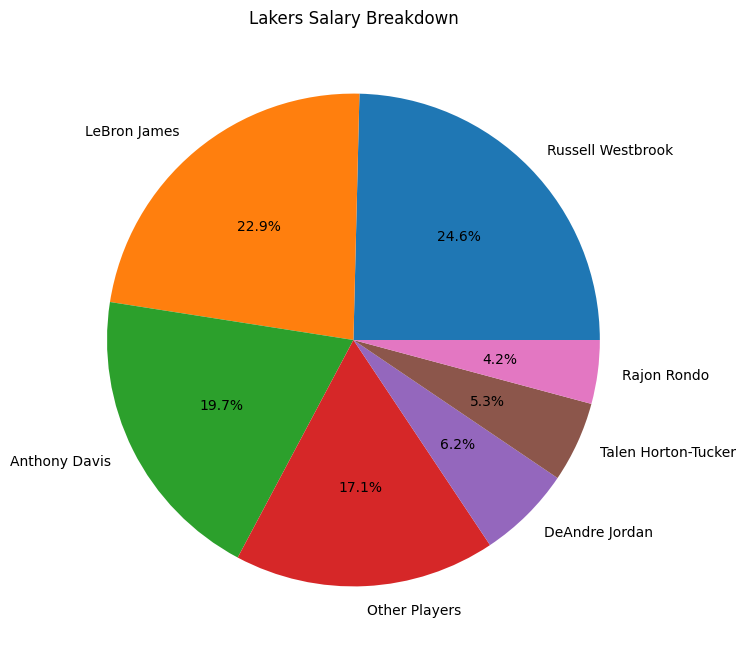

In [20]:
# Pie Chart - Show  the Lakers players salary breakdown, who takes up the most of the salary budget?
fig, ax = plt.subplots(figsize=(14,8), dpi=100)
# set title
plt.title(label='Lakers Salary Breakdown')
# write code to create pie chart here
plt.pie(LAL_top_salaries['Salary'],labels = LAL_top_salaries['top_players'], autopct = '%1.1f%%')

plt.show()
